# Cluster vs. Labeln 
campare performance/efficiency from both Alg

In [14]:
#Imports
from matplotlib import pyplot as plt
import numpy as np
import cv2
from scipy.ndimage import label, find_objects, median_filter
from sklearn.cluster import KMeans

(1456, 1936)
[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [2 2 2 ... 3 2 2]
 [2 2 3 ... 2 2 2]
 [2 2 2 ... 2 3 2]]


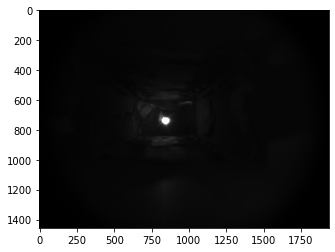

In [4]:
#Bild laden

im = cv2.imread('D:\\HZB\\BA_epics_camera\\Testaufbau\\Versuch2\\Stoff_im_Gang_Tuch_vor_Handy.bmp')

def rgb2gray(Img):
    row,col,ch = Img.shape
    g = [ ]  
    for i in range(row) :
        a = []
        for j in range(col):
            a.append(Img[i,j,0])
        g.append(a)
    gr = np.array(g)
    return gr

Im = rgb2gray(im)
print(Im.shape)
print(Im)
plt.imshow(Im, cmap='gray')
plt.show()

Clustering

In [32]:
y_len, x_len = Im.shape[0], Im.shape[1] 
#print(x_len, y_len)
x_werte = np.repeat(np.array([range(0,x_len)]), y_len, axis=0) 
print("x", x_werte.shape, x_werte)
#y-Werte entprechen dem mathematischen Koordinatensystem, nicht den Achsenbeschriftungen von der Grafik bisher
y_werte = np.repeat(np.array([range(y_len-1, -1, -1)]).reshape(y_len,1), x_len, axis=1)
print("y", y_werte.shape, y_werte)

#jeder Punkt jtz eine x, y- Koordinate und einen z-wert 
#Skalierung hier noch ausbaubar
x_werte = np.array(x_werte.flatten(), dtype=np.float64) / x_len
y_werte = np.array(y_werte.flatten(), dtype=np.float64) / y_len
z_werte = np.array(Im.flatten(), dtype=np.float64) 
#print(x_werte)
#print(y_werte)
#print(z_werte)

cluster_data = np.stack((x_werte, y_werte, z_werte), axis=-1)
print(cluster_data)

x (1456, 1936) [[   0    1    2 ... 1933 1934 1935]
 [   0    1    2 ... 1933 1934 1935]
 [   0    1    2 ... 1933 1934 1935]
 ...
 [   0    1    2 ... 1933 1934 1935]
 [   0    1    2 ... 1933 1934 1935]
 [   0    1    2 ... 1933 1934 1935]]
y (1456, 1936) [[1455 1455 1455 ... 1455 1455 1455]
 [1454 1454 1454 ... 1454 1454 1454]
 [1453 1453 1453 ... 1453 1453 1453]
 ...
 [   2    2    2 ...    2    2    2]
 [   1    1    1 ...    1    1    1]
 [   0    0    0 ...    0    0    0]]
[[0.00000000e+00 9.99313187e-01 2.00000000e+00]
 [5.16528926e-04 9.99313187e-01 2.00000000e+00]
 [1.03305785e-03 9.99313187e-01 2.00000000e+00]
 ...
 [9.98450413e-01 0.00000000e+00 2.00000000e+00]
 [9.98966942e-01 0.00000000e+00 3.00000000e+00]
 [9.99483471e-01 0.00000000e+00 2.00000000e+00]]


[0 0 0 ... 0 0 0]


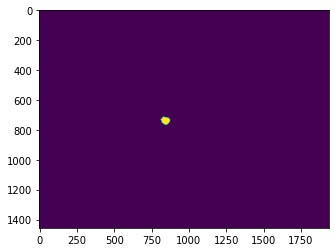

In [30]:
def cluster_KMeans (np_a, n_cluster):
    kmeans = KMeans(n_clusters=n_cluster, random_state=2)
    kmeans_labels = kmeans.fit(np_a).labels_
    return kmeans_labels

cluster_result = cluster_KMeans(cluster_data, 2)
print(cluster_result)

final_cluster = cluster_result.reshape(Im.shape)
plt.imshow(final_cluster)
plt.show()

Gedanken Cluster:
- Clustering Alg nicht gleich Clustering Alg, vlt zwei schnellere CLustering Alg vergleichen
- Problematik: # Culster finden
- auch bei weniger Daten langsam? 
- Treffsicherheit gut?
- Skalierung noch ausbaubar